In [1]:
from tsp_annealing import *
import matplotlib.pyplot as plt

# Additional functions

In [52]:
def plot_TSP_solution(cities, permutation_method, opt_solution=None, **kwargs):
    plt.figure(figsize=(8, 6))
    plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
    plt.title('Map')

    distances = calculate_distances(cities)

    best_tour, best_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, 
                                                                    altering_method=permutation_method, **kwargs)

    print("Best tour:", best_tour)
    print("Best distance:", best_distance)

    plot_tour(best_tour, cities, permutation_method)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(cost_over_iterations)
    if opt_solution is not None:
        opt_line = [opt_solution for _ in range(len(cost_over_iterations))]
        plt.plot(opt_line, linestyle='--', color='black')
    plt.title('Tour Distance Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Distance')
    plt.show()

    plt.plot(temperature_over_interations)
    plt.title('Temperature Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Temperature')

    plt.show()



def metrics(cities, permutation_method, print_results=True, **kwargs):
    distances = calculate_distances(cities)

    best_tour, best_tour_distance, _, _ = perform_annealing(distances, altering_method=permutation_method, **kwargs)

    best_tour_coordinates = tour_to_cities(best_tour, cities)

    if print_results:
        print('Method = \'%s\''%(permutation_method))
        print("Best distance:", best_tour_distance)
        print('With %i intersections \n'%(count_intersections(best_tour_coordinates)))
    
    return best_tour_distance, count_intersections(best_tour_coordinates)

# Loading data

In [3]:
opt_distance_51, opt_distance_280, opt_distance_442 = calculate_optimal_distances()

cities_51 = load_graph('TSP-Configurations/eil51.tsp.txt')
cities_280 = load_graph('TSP-Configurations/a280.tsp.txt')
cities_442 = load_graph('TSP-Configurations/pcb442.tsp.txt')

distances_51 = calculate_distances(cities_51)
distances_280 = calculate_distances(cities_280)
distances_442 = calculate_distances(cities_442)

# Permutation operators testing

In [41]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')

metrics(cities, 'swap')
metrics(cities, 'insert')
metrics(cities, 'reverse')

print('Actual optimal distance:', opt_distance_51)

Method = 'swap'
Best distance: 654.6774209749186
With 19 intersections 

Method = 'insert'
Best distance: 551.0753504624179
With 11 intersections 

Method = 'reverse'
Best distance: 448.3314983983136
With 1 intersections 

Actual optimal distance: 447.79299344253565


In [42]:
cities = load_graph('TSP-Configurations/a280.tsp.txt')

metrics(cities, 'swap')
metrics(cities, 'insert')
metrics(cities, 'reverse')

print('Actual optimal distance:', opt_distance_280)

Method = 'swap'
Best distance: 12950.040417552771
With 1074 intersections 

Method = 'insert'
Best distance: 11347.868831463022
With 887 intersections 

Method = 'reverse'
Best distance: 9770.350673119348
With 545 intersections 

Actual optimal distance: 2586.7696475631606


Averaged comparison between best results using different permutation operators

In [9]:
cities = load_graph('TSP-Configurations/a280.tsp.txt')

methods = ['swap', 'insert', 'reverse']
num_runs = 50

kwargs_list = []
for method in methods:
    kwargs_list.append({   
            'num_runs': num_runs,
            'distances': distances_280,
            'altering_method': method,
            'max_iterations': int(1E6),
            'final_temp': 1E-10,
            'output': 'fitness_statistics'
        }
    )

output = run_concurrent(run_simulations, kwargs_list);

for (elem, method) in zip(output, methods):
    print(f'Mean distance using {method}: {elem[0]})')
    print('CI:', elem[2])
    print('Error:', elem[0] - opt_distance_280)
    print()


Time taken with concurrency: 236.25101256370544 seconds
Mean distance using swap: 8808.954980529219)
CI: (8707.989673972053, 8909.920287086385)
Error: 6222.185332966059

Mean distance using insert: 7242.69259763562)
CI: (7160.217015964193, 7325.168179307047)
Error: 4655.92295007246

Mean distance using reverse: 4559.67746078004)
CI: (4526.724526536734, 4592.630395023346)
Error: 1972.9078132168793



In [47]:
""" A possible way to justify num_runs """

CI_radius_swap = (output[0][2][1] - output[0][2][0]) / 2
mean_distance_swap = output[0][0]
ratio_swap = CI_radius_swap / mean_distance_swap

CI_radius_insert = (output[1][2][1] - output[1][2][0]) / 2
mean_distance_insert = output[1][0]
ratio_insert = CI_radius_insert / mean_distance_insert

CI_radius_reverse = (output[2][2][1] - output[2][2][0]) / 2
mean_distance_reverse = output[2][0]
ratio_reverse = CI_radius_reverse / mean_distance_reverse

print(f'swap: CI_r / mean = {round(ratio_swap * 100, 5)}%')
print(f'insert: CI_r / mean = {round(ratio_insert * 100, 5)}%')
print(f'reverse: CI_r / mean = {round(ratio_reverse * 100, 5)}%')


swap: CI_r / mean = 1.14617%
insert: CI_r / mean = 1.13874%
reverse: CI_r / mean = 0.7227%


Best tour: [21 27 30 25  6 22 47  7 45 11 14 44 33 29 49 10 31  0 26 43 36 46 50  5
 42 23 13 24 12 18 39 40  3 17 16 41 32 38  9 48  4 37  8 19  2 35 34 28
 20 15  1]
Best distance: 608.1329336520885


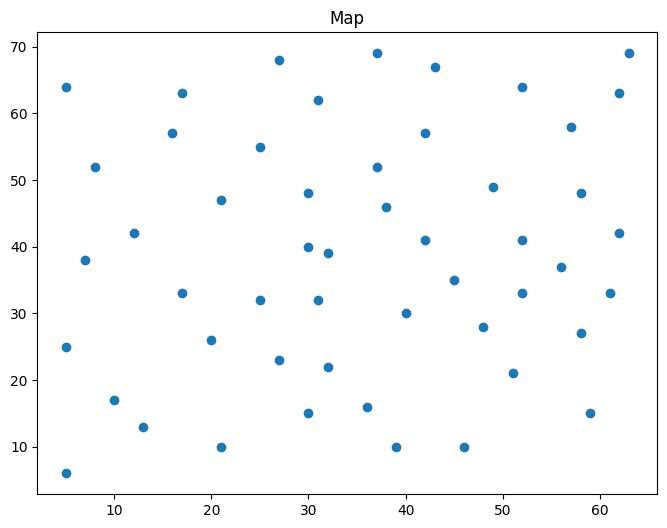

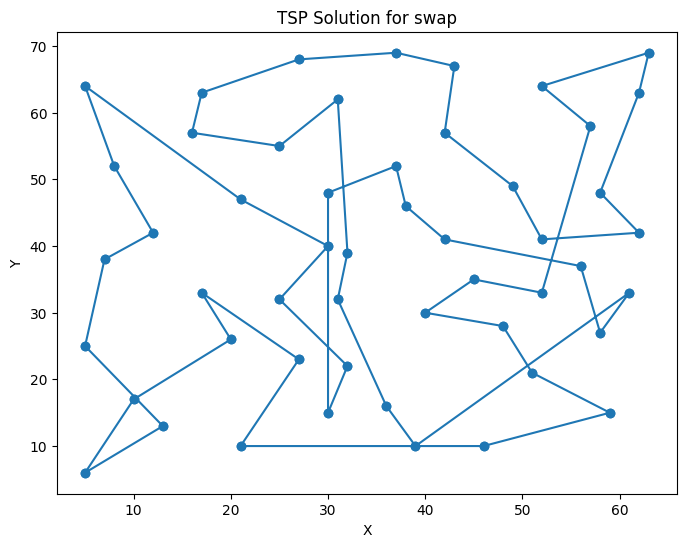

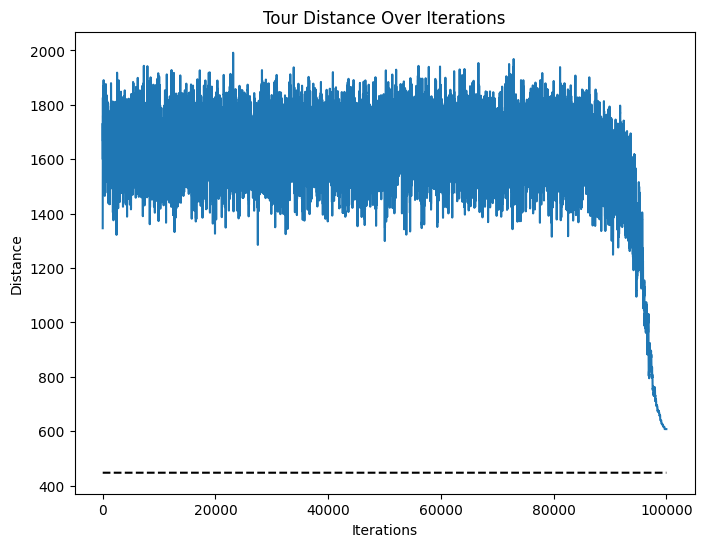

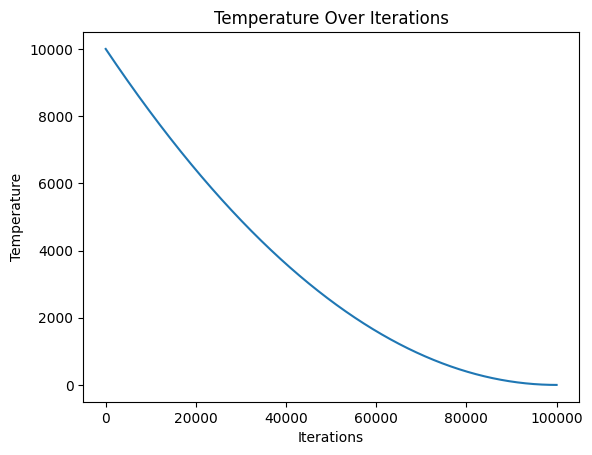

Best tour: [14, 44, 32, 38, 29, 33, 1, 31, 50, 45, 26, 5, 47, 6, 22, 42, 23, 13, 24, 12, 40, 39, 18, 41, 9, 48, 8, 49, 10, 0, 21, 7, 25, 30, 27, 2, 19, 35, 34, 28, 20, 15, 37, 4, 11, 46, 17, 3, 16, 36, 43]
Best distance: 494.03775412574925


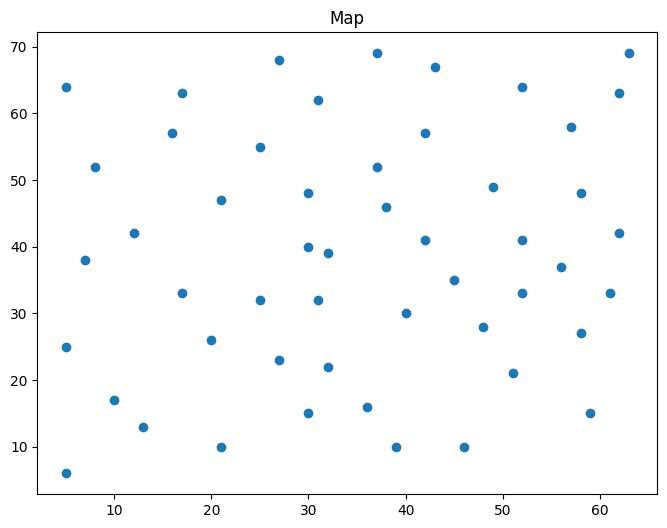

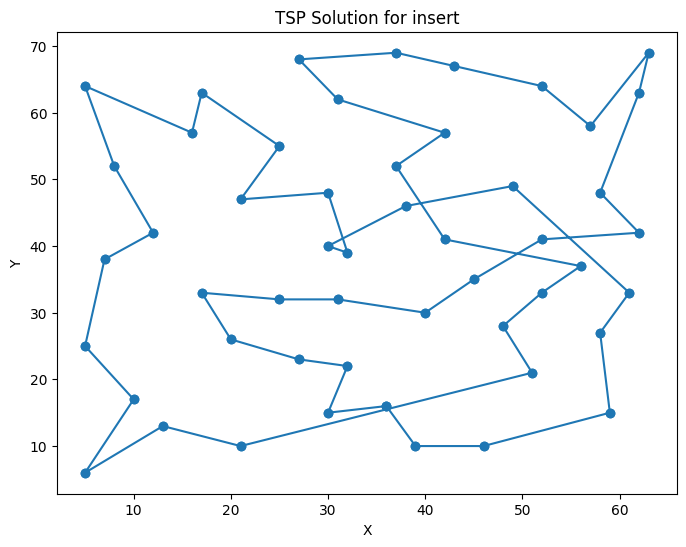

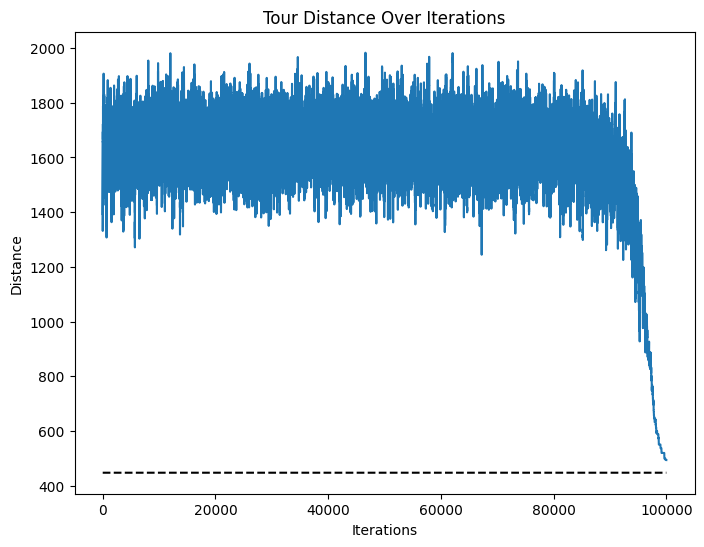

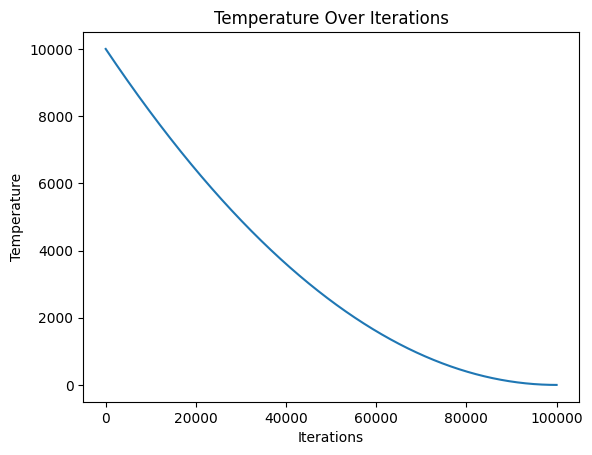

Best tour: [18 41 16 43 44 32 14 36 11  4 37  8 48  9 38 29 33 15 49 20 28  1 21  2
 19 34 35 27 30 25  6 42 23 22 47  5 26  7  0 31 10 45 50 46  3 17 13 24
 12 40 39]
Best distance: 475.73478653211424


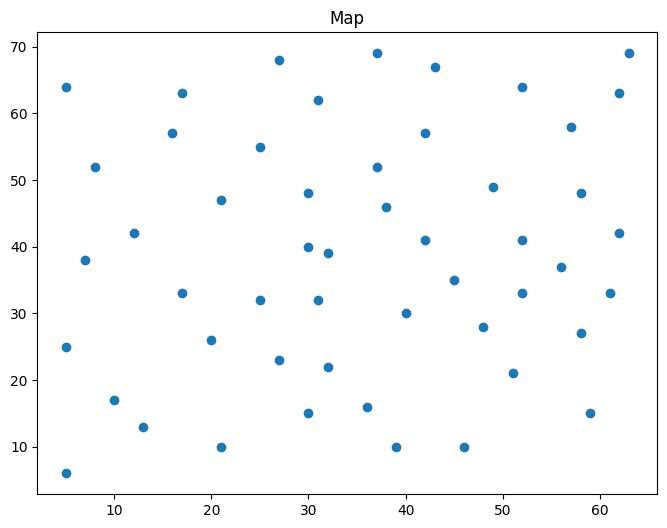

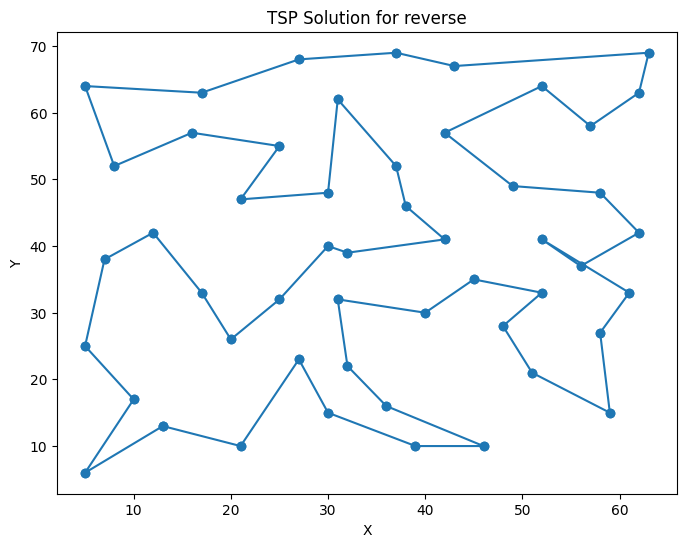

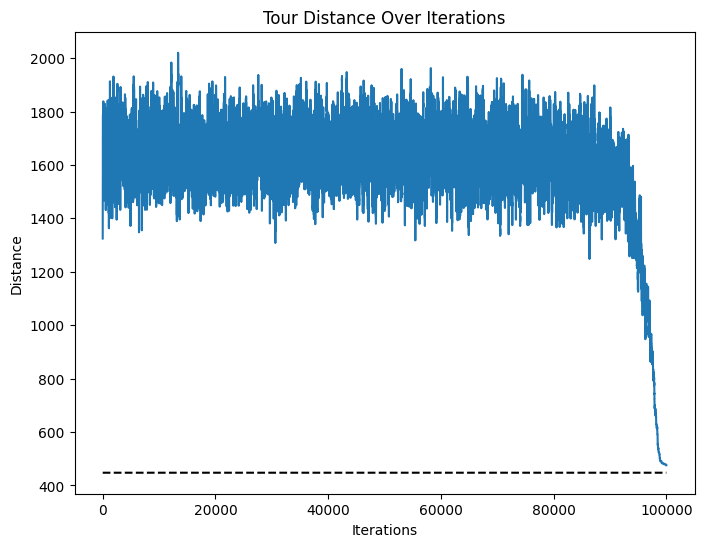

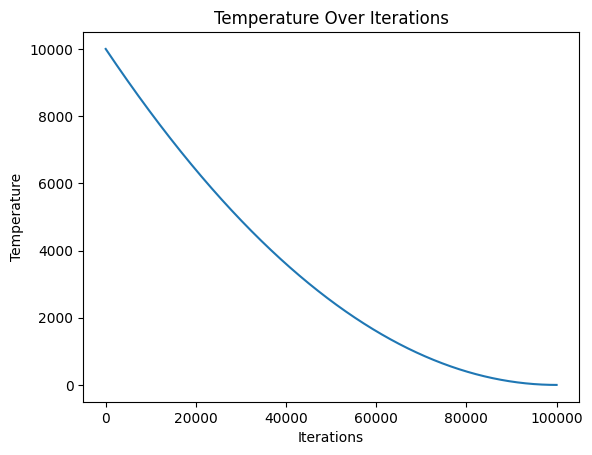

In [54]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')

max_iterations = int(1E5) 
final_temp = 1E-6
cooling_schedule = 'quadratic_a'
alpha = 1 - 1E-7

plot_TSP_solution(cities, 'swap',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha, opt_solution=opt_distance_51)
plot_TSP_solution(cities, 'insert',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha, opt_solution=opt_distance_51)
plot_TSP_solution(cities, 'reverse',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha, opt_solution=opt_distance_51)

# Cooling schedules

# Chain length

# Max iterations analysis

In [13]:
distances = distances_280
max_iterations_list = range(100, 100000, 10000)
num_runs = 20
final_temp = 1E-7
cooling_schedule = 'linear_m'
alpha = 1 - 1E-5
permutation_method = 'reverse'

opt_distance_line = [opt_distance_280 for _ in max_iterations_list]

means, stds, conf_intervals = run_vary_maxiter_concurrent(num_runs, distances, max_iterations_list, altering_method = permutation_method,
                                                          final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha)

Time taken with concurrency: 385.630309343338 seconds


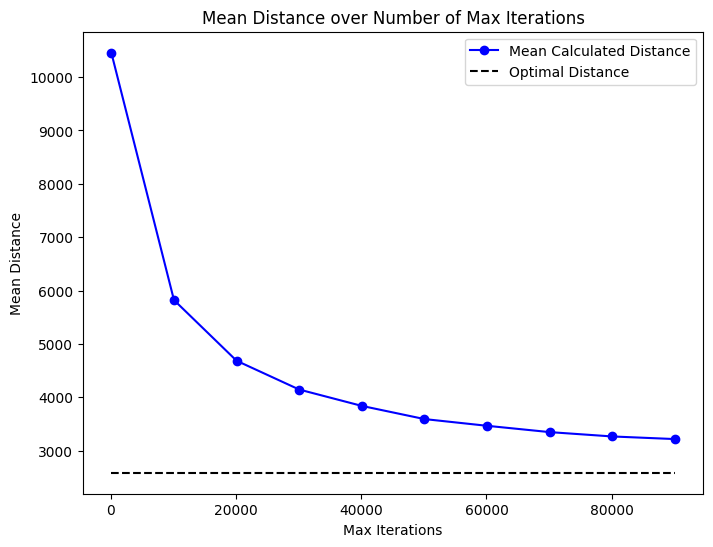

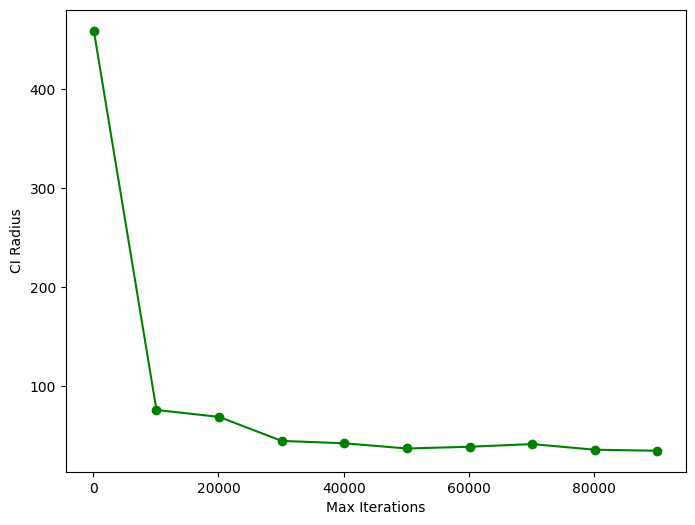

In [15]:
means = np.array(means)
lower_bounds = np.array([interval[0] for interval in conf_intervals])
upper_bounds = np.array([interval[1] for interval in conf_intervals])
ci_radius = (upper_bounds - lower_bounds) / 2

plt.figure(figsize=(8, 6))
plt.plot(max_iterations_list, means, marker='o', linestyle='-', color='blue', label='Mean Calculated Distance')
plt.plot(max_iterations_list, opt_distance_line, linestyle='--', color='black', label='Optimal Distance')
plt.title('Mean Distance over Number of Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Mean Distance')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(max_iterations_list, ci_radius, marker='o', linestyle='-', color='green')
plt.xlabel('Max Iterations')
plt.ylabel('CI Radius')
plt.show()



# Concurrency testing

In [7]:
""" Concurrency test """

cities = load_graph('TSP-Configurations/eil51.tsp.txt')
max_iterations = int(1E6)
final_temp = 1E-8
cooling_schedule = 'quadratic_a'
alpha = 1 - 1E-9
distances = calculate_distances(cities)

annealing_kwargs = {
    'distances': distances,
    'altering_method': 'swap',
    'max_iterations': max_iterations,
    'final_temp': final_temp,
    'cooling_schedule': cooling_schedule,
    'alpha': alpha
}

output = run_concurrent(perform_annealing, **annealing_kwargs)


start_time = time.time()
perform_annealing(**annealing_kwargs)
perform_annealing(**annealing_kwargs)
perform_annealing(**annealing_kwargs)
end_time = time.time()
print('Time taken with NO concurrency', end_time - start_time)


Time taken with concurrency: 33.30184364318848 seconds
Time taken with NO concurrency 68.22779822349548


In [31]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')
max_iterations = int(1E6)
final_temp = 1E-8
cooling_schedule = 'quadratic_a'
alpha = 1 - 1E-9
distances = calculate_distances(cities)

kwargs_list = [
    {
        'distances': distances,
        'altering_method': 'swap',
        'max_iterations': max_iterations,
        'final_temp': final_temp,
        'cooling_schedule': cooling_schedule,
        'alpha': alpha
    },
    {
        'distances': distances,
        'altering_method': 'insert',
        'max_iterations': max_iterations,
        'final_temp': final_temp,
        'cooling_schedule': cooling_schedule,
        'alpha': alpha
    },
    {
        'distances': distances,
        'altering_method': 'reverse',
        'max_iterations': max_iterations,
        'final_temp': final_temp,
        'cooling_schedule': cooling_schedule,
        'alpha': alpha
    }
]

# Function perform_annealing needs to be defined

# Call run_concurrent with the function and parameter sets
output = run_concurrent(perform_annealing, param_sets=kwargs_list)

Time taken with concurrency: 35.58396244049072 seconds


In [34]:
for i in range(3):    
    print(np.mean(output[i][1]))

518.1195121463168
462.92431915637354
443.08972401641785
